<a href="https://colab.research.google.com/github/2106076asepnurjaman/clustering/blob/main/Analisis_Cuaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis Cuaca di kota Seattle Amerika Serikat

Import Library

In [3]:
#Syntaks dibawah adalah pernyataan fungsi untuk menjalankan program
import pandas as pd
import numpy as np
import random

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.rcParams['agg.path.chunksize'] = 10000
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

Load Dataset

In [4]:
#Load CSV into Pandas Data Frame
#Membaca file CSV 'seattle-weather.csv' dan memuatnya ke dalam DataFrame 'df'
df = pd.read_csv('/content/seattle-weather.csv', usecols=['date','precipitation','temp_max','temp_min','wind','weather'])
# untuk mengubah variabel 'weather' dari tipe data kategorikal menjadi tipe data numerik.
df['weather'] = labelencoder.fit_transform(df['weather'])
#Mengubah tipe data kolom 'precipitation', 'temp_max', 'temp_min', dan 'wind' menjadi tipe data integer.
df['precipitation'] = df['precipitation'].astype(int)
df['temp_max'] = df['temp_max'].astype(int)
df['temp_min'] = df['temp_min'].astype(int)
df['wind'] = df['wind'].astype(int)
#Menampilkan lima baris pertama dari DataFrame 'df'
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0,12,5,4,0
1,2012-01-02,10,10,2,4,2
2,2012-01-03,0,11,7,2,2
3,2012-01-04,20,12,5,4,2
4,2012-01-05,1,8,2,6,2


Exploratiry Data Analysis

In [5]:
#digunakan untuk menghitung jumlah nilai yang hilang (missing values) dalam setiap kolom DataFrame 'df'
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
#digunakan untuk menampilkan tipe data (data types) dari setiap kolom dalam DataFrame 'df'.
df.dtypes

date             object
precipitation     int64
temp_max          int64
temp_min          int64
wind              int64
weather           int64
dtype: object

In [7]:
# digunakan untuk menghitung jumlah nilai non-null (non-missing values) dalam setiap kolom DataFrame 'df'
df.count

<bound method DataFrame.count of             date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01              0        12         5     4        0
1     2012-01-02             10        10         2     4        2
2     2012-01-03              0        11         7     2        2
3     2012-01-04             20        12         5     4        2
4     2012-01-05              1         8         2     6        2
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27              8         4         1     2        2
1457  2015-12-28              1         5         1     1        2
1458  2015-12-29              0         7         0     2        1
1459  2015-12-30              0         5        -1     3        4
1460  2015-12-31              0         5        -2     3        4

[1461 rows x 6 columns]>

In [8]:
#digunakan untuk menghasilkan ringkasan statistik dari DataFrame 'df'
df.describe()

,precipitation,temp_max,temp_min,wind,weather
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,2.852841,16.005476,7.848734,2.797399,2.752225
std,6.572637,7.343899,4.948611,1.468395,1.191380
min,0.000000,-1.000000,-7.000000,0.000000,0.000000
25%,0.000000,10.000000,4.000000,2.000000,2.000000
50%,0.000000,15.000000,8.000000,3.000000,2.000000
75%,2.000000,22.000000,12.000000,4.000000,4.000000
max,55.000000,35.000000,18.000000,9.000000,4.000000


In [9]:
#digunakan untuk menampilkan informasi lengkap tentang DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           1461 non-null   object
 1   precipitation  1461 non-null   int64 
 2   temp_max       1461 non-null   int64 
 3   temp_min       1461 non-null   int64 
 4   wind           1461 non-null   int64 
 5   weather        1461 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 68.6+ KB


In [10]:
#digunakan untuk mengidentifikasi baris-baris duplikat dalam DataFrame 'df'.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1456    False
1457    False
1458    False
1459    False
1460    False
Length: 1461, dtype: bool

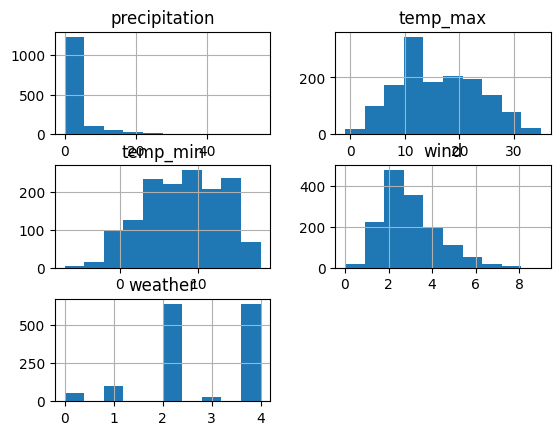

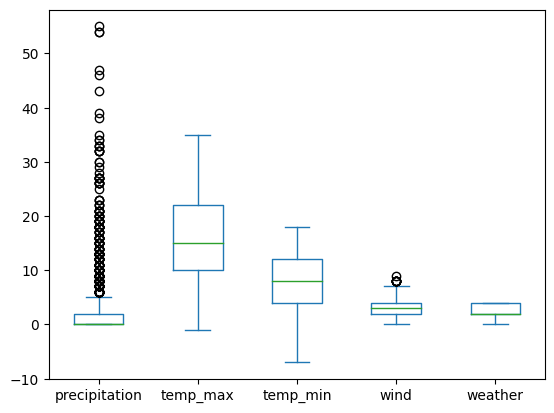

In [11]:
# berfungsi menghitung dan menampilkan histogram untuk setiap kolom numerik dalam DataFrame.
df.hist()
plt.show()

print("")
#  digunakan pada objek DataFrame df untuk menghasilkan box plot.
df.plot(kind='box')
plt.show()

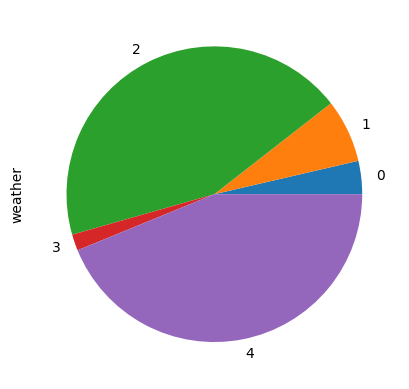

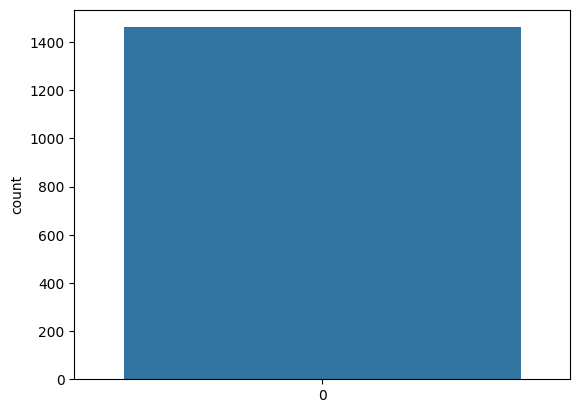

<ipython-input-12-fe0daee8fc27>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


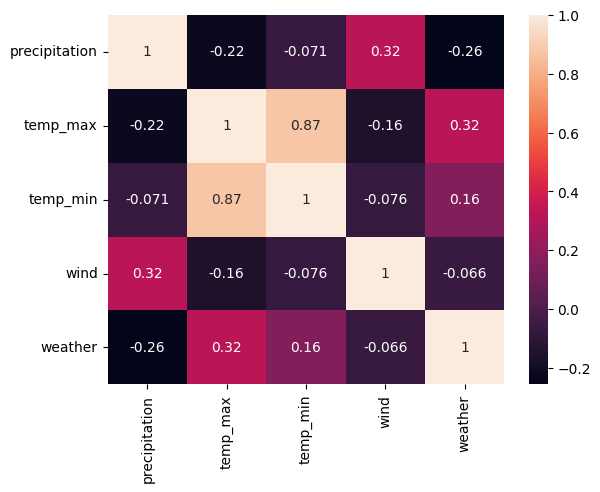

In [12]:
# dengan menggunakan sintaks di bawah, kita dapat menghasilkan dan menampilkan pie
#chart untuk menggambarkan proporsi kategori cuaca, count plot untuk menampilkan
#jumlah kemunculan setiap kategori cuaca, dan heatmap untuk menampilkan korelasi antara kolom-kolom dalam DataFrame.
df.groupby('weather').weather.count().plot(kind='pie')
plt.show()

print("")

sns.countplot(df.weather)
plt.show()

print("")

sns.heatmap(df.corr(),annot=True)
plt.show()

0 Biru: kabut
1 Oren: gerimis
2 Hijau: cerah
3 Merah: salju
4 Ungu: Hujan



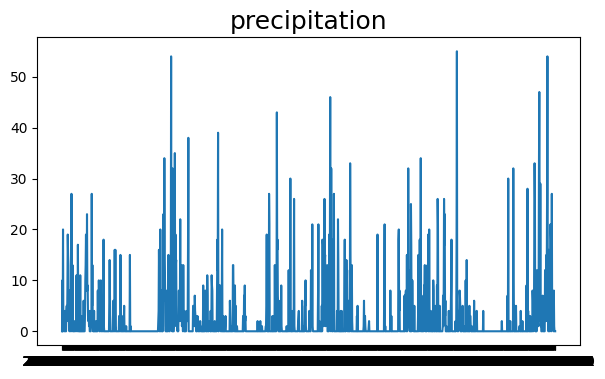

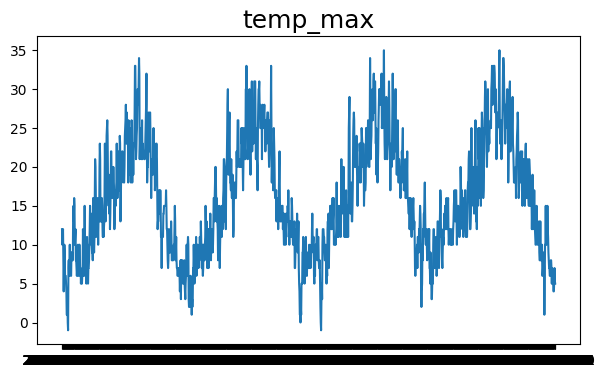

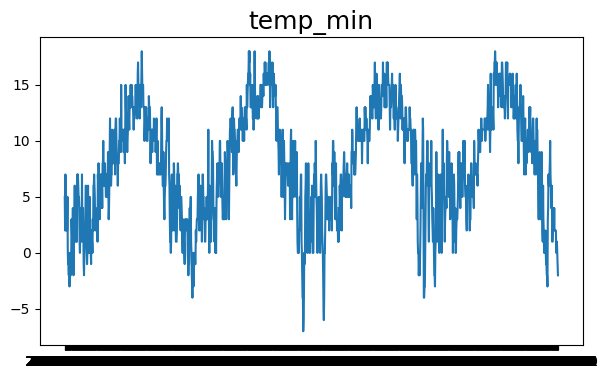

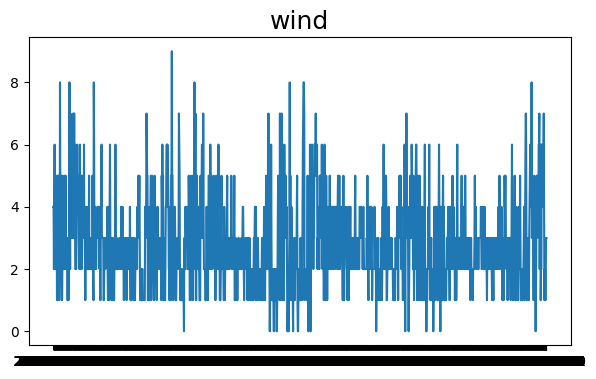

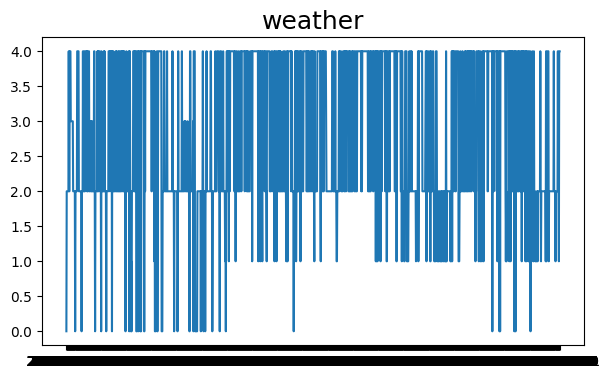

In [13]:
#Plotting each distribution
#Dengan menggunakan sintaks di bawah, kita dapat memvisualisasikan setiap kolom numerik
#dalam DataFrame df sebagai plot garis terpisah. Setiap plot garis akan memiliki sumbu x yang mewakili
#kolom 'date' dan sumbu y yang mewakili kolom numerik yang bersangkutan.
full_columns =df.columns
for i in range(1, df.shape[1]):
  plt.figure(figsize=(7,4))
  plt.plot(df['date'], df[full_columns[i]])
  plt.title(full_columns[i], fontsize=18)
  plt.show()
  print("")

Data Preprocessing

In [14]:
#Encodde Categorical Featur
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['weather'] = label_encoder.fit_transform(df['weather'])

In [15]:
#Split Dataset into Train & Test
#program dibawah adalah data latihan dan data uji dengan memisahkan fitur-fitur dari target atau label
finaldf = df.drop(['date'], axis=1)
finalsf = finaldf.reset_index(drop=True)
test_length=0.2 * len(finaldf)
end_point = len(finaldf)
x = end_point - test_length
finaldf_train = finaldf.loc[:x - 1, :]
finaldf_test = finaldf.loc[x:, :]
finaldf_test_x = finaldf_test.loc[:, finaldf_test.columns != 'weather']
finaldf_test_y = finaldf_test['weather']
finaldf_train_x = finaldf_train.loc[:, finaldf_train.columns != 'weather']
finaldf_train_y = finaldf_train['weather']

In [16]:
finaldf_train_x

,precipitation,temp_max,temp_min,wind
0,0,12,5,4
1,10,10,2,4
2,0,11,7,2
3,20,12,5,4
4,1,8,2,6
...,...,...,...,...
1163,0,14,4,1
1164,0,13,5,2
1165,2,14,8,3
1166,0,17,9,3


In [17]:
#Untuk menampilkan  daftar yang berisi nilai unik dari target atau label dalam data latihan.
finaldf_train_y.unique

<bound method Series.unique of 0       0
1       2
2       2
3       2
4       2
       ..
1163    1
1164    2
1165    2
1166    4
1167    2
Name: weather, Length: 1168, dtype: int64>

Training Model

In [18]:
#kita dapat menggunakan model yang dilatih untuk memprediksi nilai target menggunakan data uji.
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfe = RFE(RandomForestRegressor(n_estimators=100, random_state=1))
fit = rfe.fit(finaldf_train_x, finaldf_train_y)
y_pred = fit.predict(finaldf_test_x)

In [19]:
#dapat menghitung akurasi berdasarkan nilai prediksi dan nilai sebenarnya, serta
#mencetak hasilnya. Akurasi menunjukkan seberapa dekat prediksi kita dengan nilai sebenarnya dalam bentuk persentase.
import numpy as np
y_pred = y_pred.astype('int')
y_true = np.array(finaldf_test_y)
sumvalue = np.sum(y_true)
mape = np.sum(np.abs((y_true - y_pred)))/sumvalue *100
accuracy=100-mape
print('Accuracy:', round(accuracy,2),'%.')

Accuracy: 65.5 %.


In [20]:
#Ini mewakili nilai-nilai prediksi yang diperoleh dari model untuk data uji yang diberikan
y_pred

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 1, 2, 2, 2, 3,
       2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3,
       2, 3, 2, 2, 2, 2, 3, 3, 3, 4, 3, 3, 2, 2, 3, 3, 4, 3, 4, 4, 3, 3,
       3, 3, 2, 3, 4, 3, 3, 2, 2, 2, 3, 2, 3, 3, 4, 4, 4, 2, 2, 4, 4, 4,
       4, 4, 4, 3, 3, 4, 3, 1, 2, 3, 3, 3, 2, 2, 3, 4, 2, 3, 1, 2, 2, 3,
       2, 3, 4, 3, 4, 4, 4, 4, 4, 2, 2, 4, 2, 3, 2, 3, 2, 4, 2, 3, 3, 3,
       3, 3, 4, 4, 2, 2, 4, 3, 4, 2, 3, 3, 1, 3, 3, 3, 2, 3, 2, 2, 3, 2,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 1, 3, 2, 4, 3, 3, 3, 3, 2, 2, 2, 3,
       3, 2, 3, 2, 3, 3, 2, 2, 1, 1, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3,
       2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 1, 2, 3, 3, 3, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 3, 3])

  Kesimpulannya manfaat pengolahan data cuaca di suatu daerah bisa digunakan untuk memprediksi cuaca dihari berikutnya atau bisa juga digunakan untuk mengamati perubahan yang terjadi dari tahun ke tahun seperti perubahan yang sangat drastis